# Dataset Preparation
Assemble and validate a dataset of EHD runs and measurements

In [5]:
import sys
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

sys.path.append('..')
from ehd_dataset import EHD_Loader, compile_ehd_dataset
from ehd_models import EHD_Model


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

INDEX = "C:/Dropbox/SPEED/Self Driving EHD/Datasets/dataset_index.xlsx"
Dataset_Pkl = "C:/Dropbox/SPEED/Self Driving EHD/Datasets/compiled_data.pickle"
Dataset_Excel = "C:/Dropbox/SPEED/Self Driving EHD/Datasets/compiled_data.xlsx"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Compile the dataset
compile_ehd_dataset(INDEX, Dataset_Pkl, Dataset_Excel)

Failed to load 10-Mar-2022 large nozzle mosaic: 'DataFrame' object has no attribute 'note'
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\29-Mar-2022 lg 1cm 300 points	263 points	offset 2	corr 0.4979414348873561
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 1	121 points	offset 32	corr 0.6417618745477631
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 2	528 points	offset 4	corr 0.6184015138069094
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\23-May-2022_squares	352 points	offset 8	corr 0.5521885646579606
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\24-May-2022 large harmonics	682 points	offset 0	corr 0.5871179189117662
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\8-Aug-2022_lg-square-20um	686 points	offset 1	corr 0.8454268563076222
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-10um	149 points	offset 16	corr 0.7935638727333442
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-

In [7]:
# Load up the dataset
loader = EHD_Loader(Dataset_Pkl)

print("Datasets Loaded!\n>> Quick correlation validation check -- [auac; vec L2] <<")

for i, df in enumerate(loader.datasets):
    AUAC, _ = pearsonr(df.area,
                       df.wave.apply(lambda x: np.sum(np.abs(x))))
    VL2, _ = pearsonr(df.area,
                       df.vector.apply(lambda x: np.sqrt(np.sum(x**2))))
    print(f"<<{loader.names[i]} -- [{AUAC:.3f}; {VL2:.3f}]", end='>> ')

Datasets Loaded!
>> Quick correlation validation check -- [auac; vec L2] <<
<<29-Mar-2022 lg 1cm 300 points -- [0.498; 0.661]>> <<2-May-2022__run 1 -- [0.642; 0.826]>> <<2-May-2022__run 2 -- [0.618; 0.796]>> <<23-May-2022_squares -- [0.552; 0.759]>> <<24-May-2022 large harmonics -- [0.587; 0.763]>> <<8-Aug-2022_lg-square-20um -- [0.845; 0.524]>> <<10-Sep-2022_std-square-10um -- [0.794; 0.654]>> <<10-Sep-2022_std-square-20um -- [0.816; 0.870]>> <<13-Sep-2022_std-square-30um -- [0.770; 0.696]>> <<13-Sep-2022_std-square-40um -- [0.793; 0.842]>> <<27-Feb-23_sf-sin-line-20um -- [0.268; 0.026]>> 

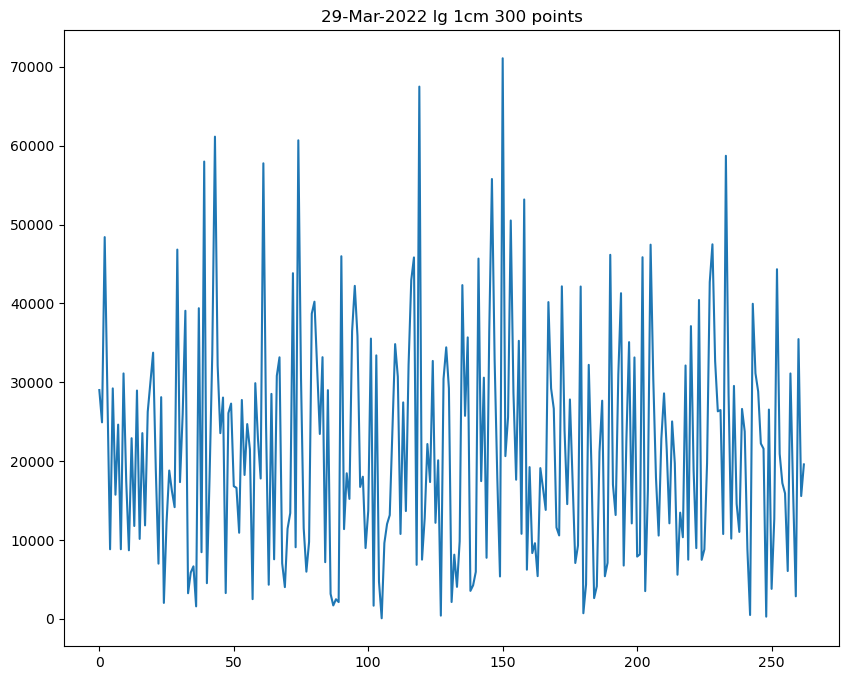

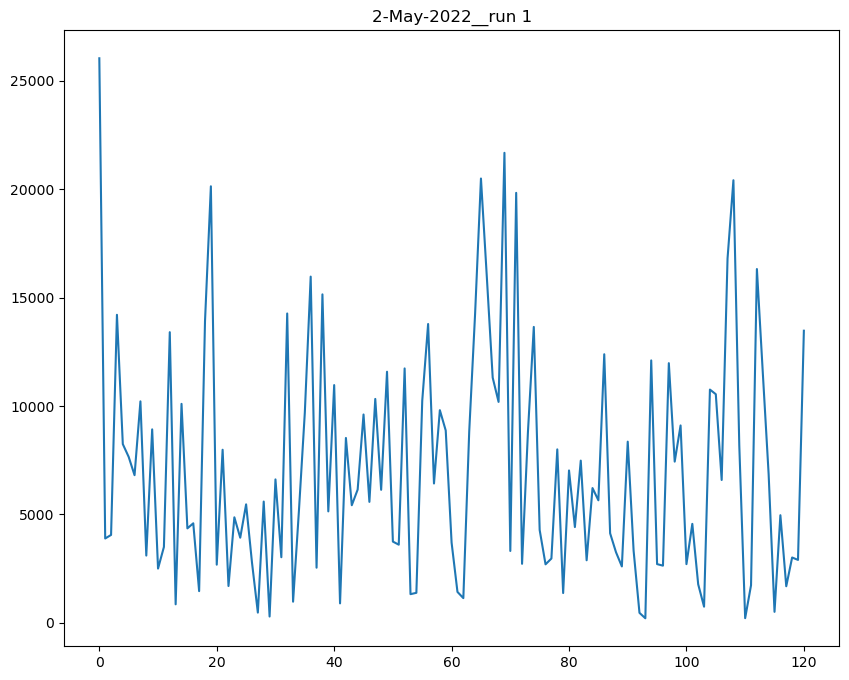

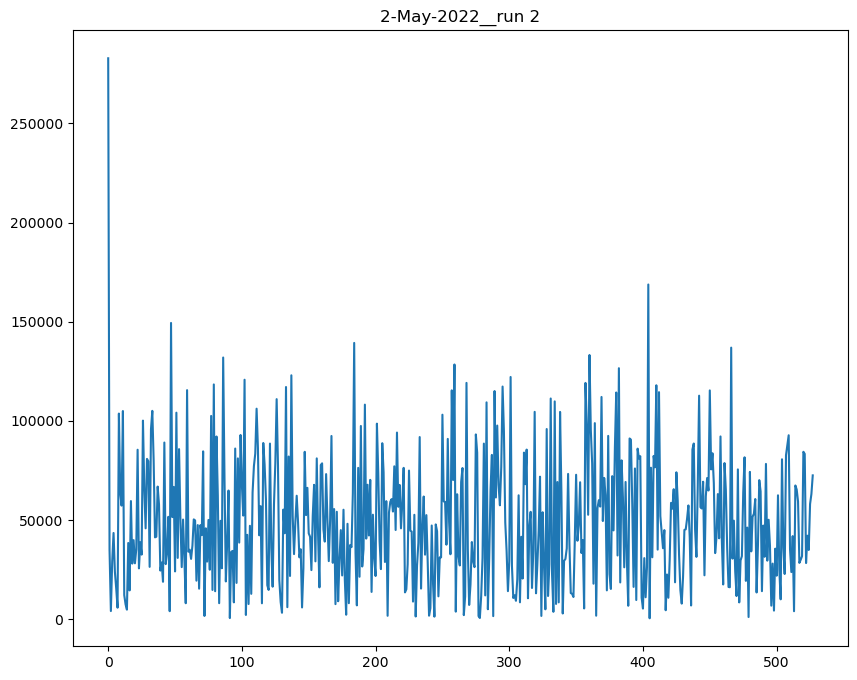

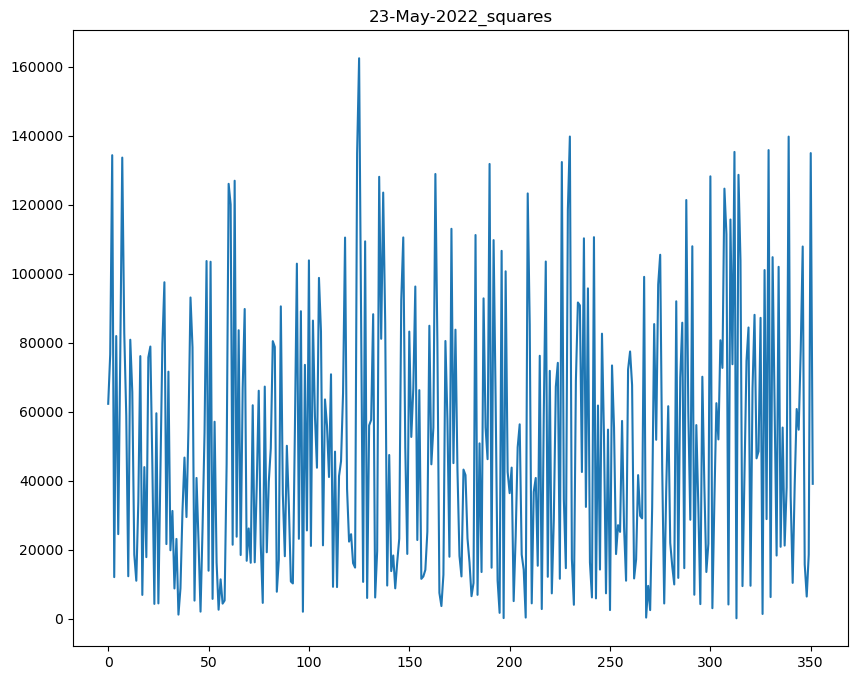

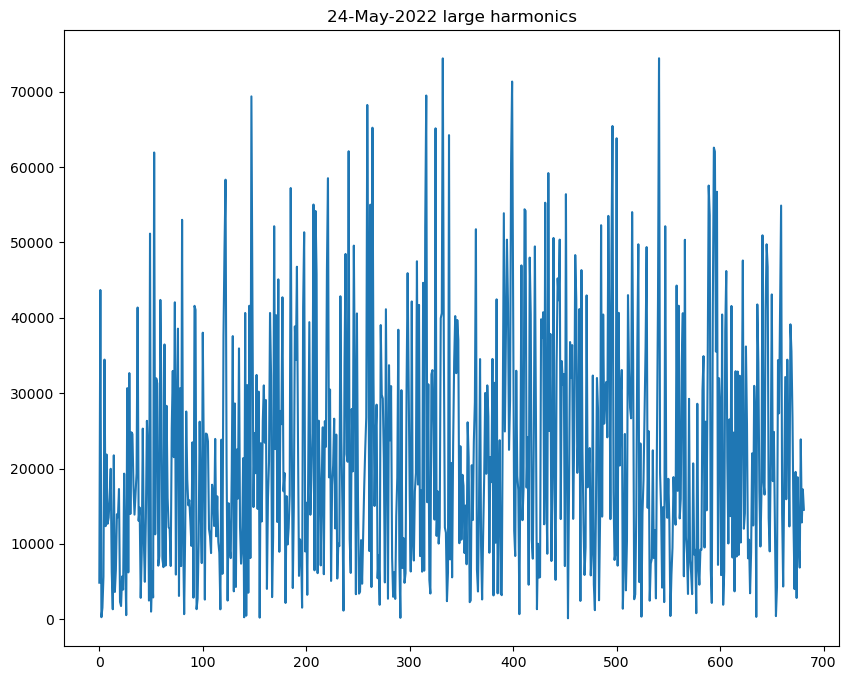

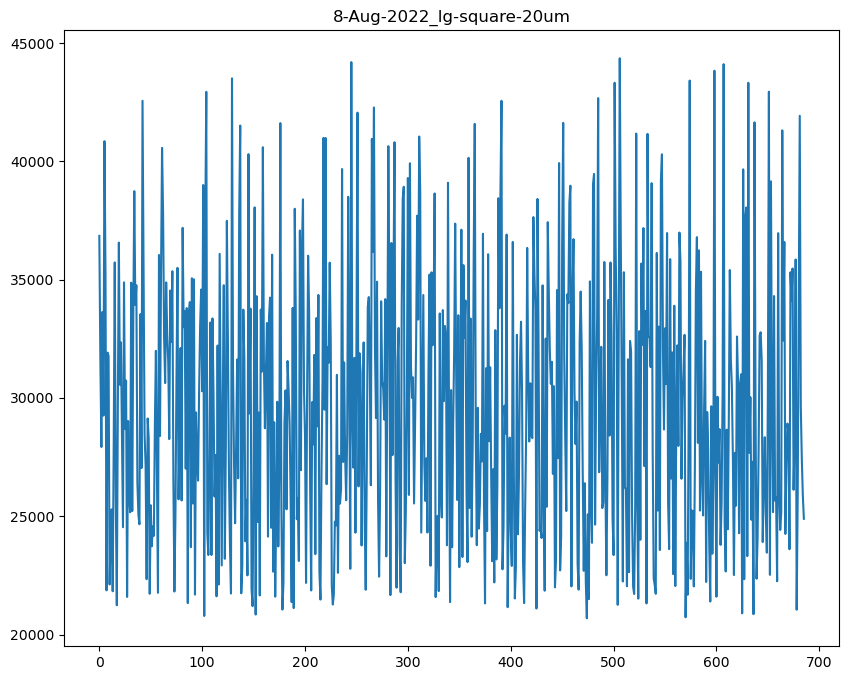

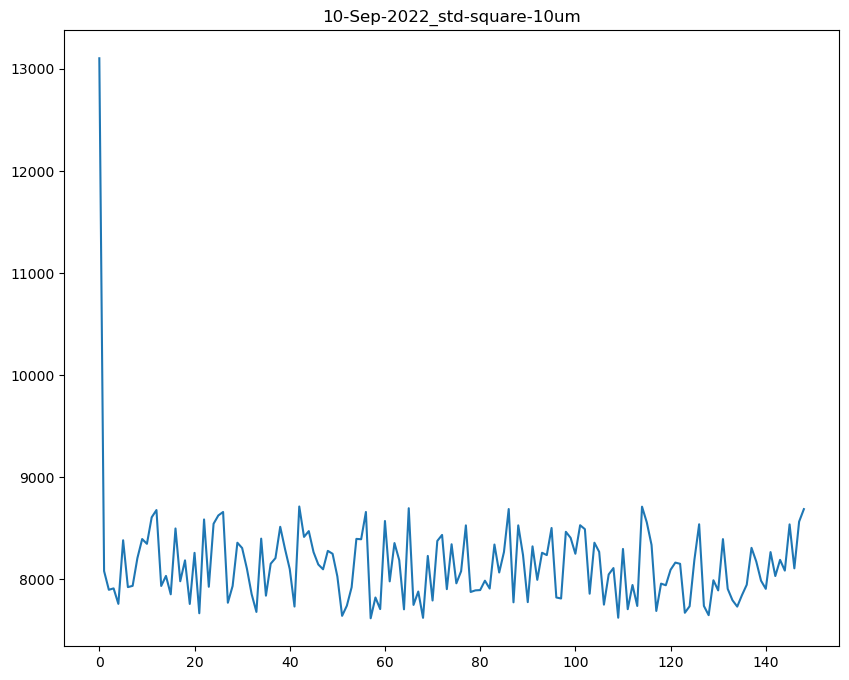

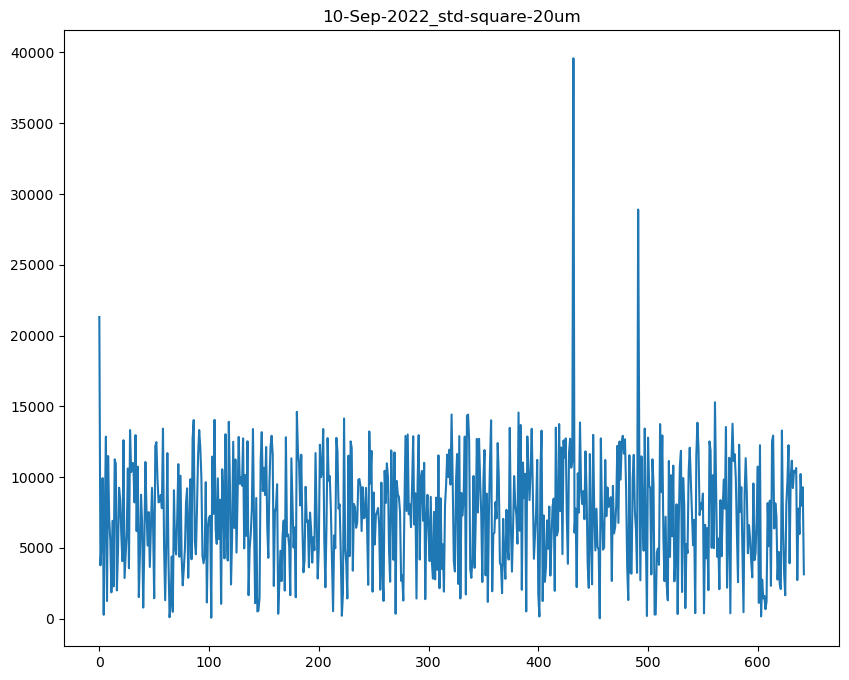

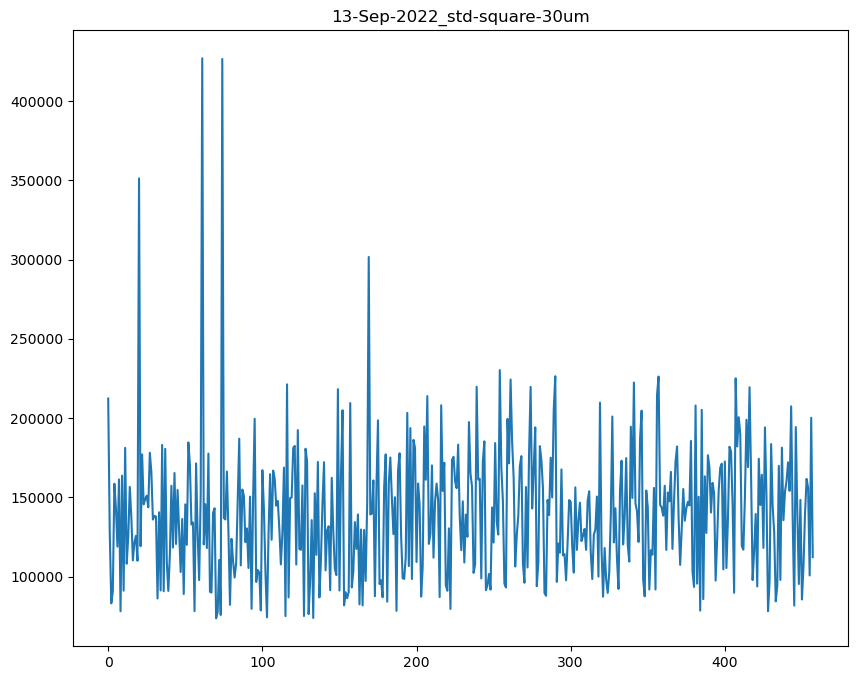

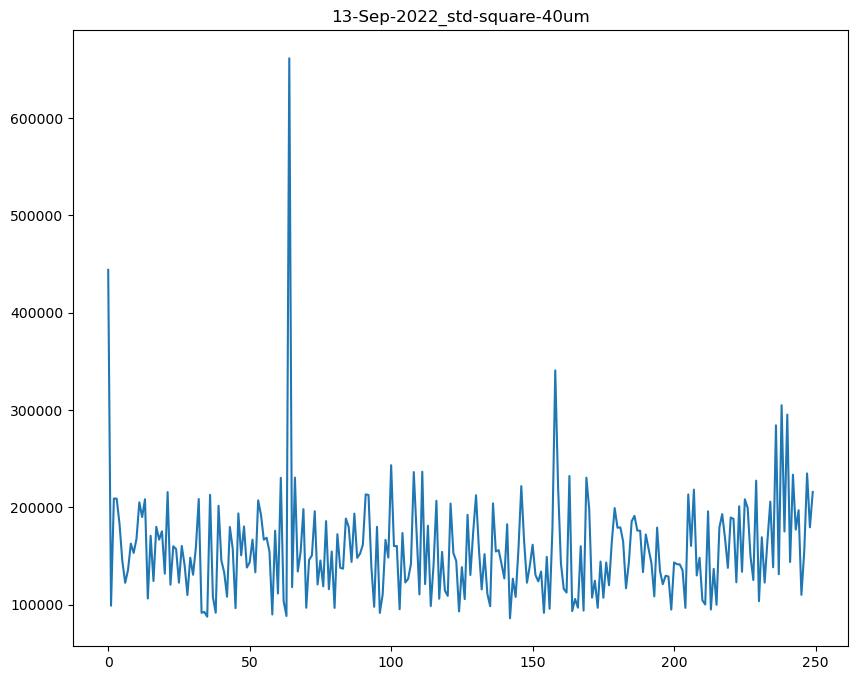

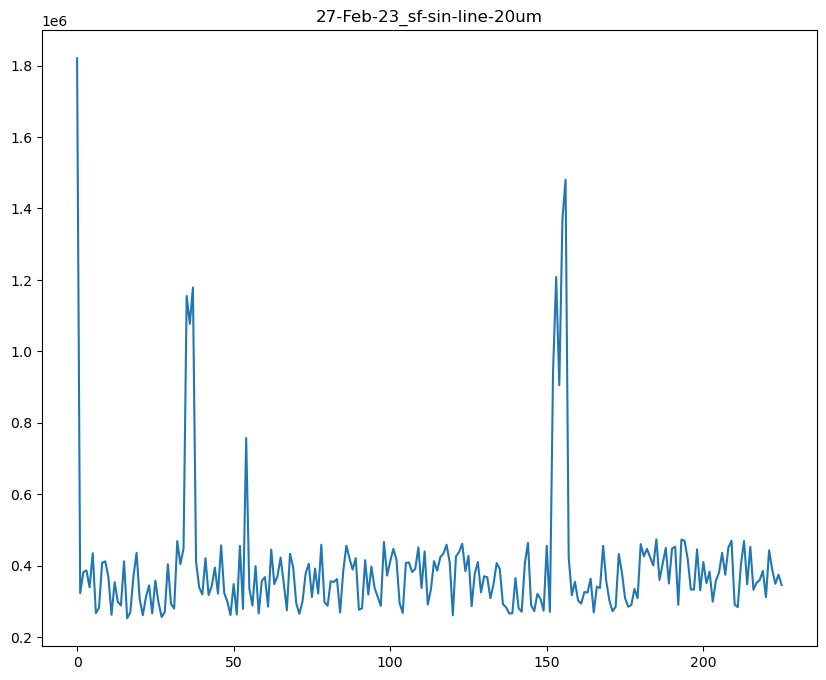

In [4]:
# Check dataset correlations
for i, df in enumerate(loader.datasets):
    regression = LinearRegression()
    X = np.array(df.wave.apply(lambda x: np.sum(np.abs(x))))[:, None]
    Y = np.array(df.area)
    regression.fit(X, Y)
    X_prime = regression.predict(X)
    residuals = np.abs(X_prime - X.flatten())
    plt.plot(residuals)
    plt.title(loader.names[i])
    plt.show()